### Predicting the Movement of APPLE Inc Stock Price

In [1]:
import pandas as pd
import nltk
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("AAPL.csv")

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [5]:
df.describe()

,Unnamed: 0,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,628.500000,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,363.297628,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,0.000000,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,314.250000,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,628.500000,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,942.750000,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,1257.000000,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


### Plotting the Stock Data

In [6]:
import matplotlib.pyplot as plt

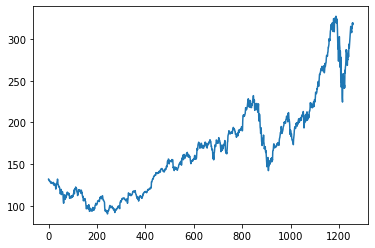

In [7]:
plt.plot(df['close'])

### Scaling the data as LSTM's are sensitive to numeric values, this is a good paractice to normalise values before applying any ML algorithm, if you have data across uneven ranges over a lot of parameters

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
#Resetting Index and selecting only
df_1 = df.reset_index()['close']

In [10]:
df_1.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

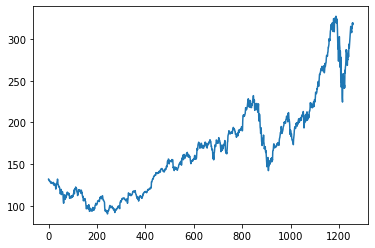

In [11]:
plt.plot(df_1)

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
df_1 = scaler.fit_transform(np.array(df_1).reshape(-1,1))

In [13]:
df_1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [14]:
df_1.shape

(1258, 1)

### Now Since we are working on time series data its always we have to split sequentially for train_test_split

In [15]:
#Lets set the train size and test size and do the split

In [16]:
train_size=int(len(df_1)*0.70)  #Split is 70% train and 30% test
test_size=len(df_1)-train_size

In [17]:
train_data, test_data=df_1[0:train_size,:], df_1[train_size:len(df_1),:1]

In [18]:
train_size, test_size

(880, 378)

In [19]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [20]:
test_data

array([[0.3657857 ],
       [0.36494132],
       [0.34598497],
       [0.355822  ],
       [0.35421768],
       [0.38250443],
       [0.37663599],
       [0.37254074],
       [0.39888542],
       [0.36456134],
       [0.35624419],
       [0.32994174],
       [0.33462805],
       [0.3305328 ],
       [0.3325171 ],
       [0.34032762],
       [0.31723381],
       [0.31073208],
       [0.31972473],
       [0.29785527],
       [0.28071435],
       [0.25496074],
       [0.23849531],
       [0.28214979],
       [0.27784345],
       [0.2781812 ],
       [0.28455628],
       [0.28531622],
       [0.21890568],
       [0.24453264],
       [0.24313941],
       [0.25504517],
       [0.26585325],
       [0.26792198],
       [0.26154691],
       [0.25187875],
       [0.26483999],
       [0.27273495],
       [0.2766191 ],
       [0.28067213],
       [0.26581103],
       [0.26842861],
       [0.26327789],
       [0.28464072],
       [0.27847674],
       [0.27163725],
       [0.31626277],
       [0.321

#### Convert to the dataset matrix

In [21]:
def create_dataset(dataset, time_step=1):
    data_X, data_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  #i=0,1,2,3,4,5
        data_X.append(a)
        data_Y.append(dataset[i+time_step, 0])
    return np.array(data_X), np.array(data_Y)

In [22]:
# Reshape into X=t, t+1, t+2 and Y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [23]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.38769737 0.39723888 0.39609896 ... 0.48184582 0.43836021 0.43016972]
 [0.39723888 0.39609896 0.40175631 ... 0.43836021 0.43016972 0.40724479]
 [0.39609896 0.40175631 0.40010977 ... 0.43016972 0.40724479 0.42670776]]


In [24]:
print(Y_train)

[0.0873934  0.09030651 0.09891919 0.09887697 0.10622309 0.1213375
 0.10529427 0.10221228 0.12213966 0.12745926 0.1231107  0.1302035
 0.13607194 0.13366546 0.1291058  0.12969687 0.12762813 0.1115849
 0.10879845 0.1071519  0.09288187 0.10062906 0.09858144 0.11378029
 0.12007093 0.12226632 0.11572237 0.12049312 0.1169045  0.11597568
 0.11804441 0.11399139 0.10951617 0.10495651 0.1211264  0.11795998
 0.11774888 0.10672971 0.10905176 0.09642827 0.09347294 0.08507135
 0.08865997 0.07869628 0.06624166 0.07173014 0.07130795 0.07713417
 0.07468547 0.06957697 0.07768302 0.07168792 0.0629908  0.06337077
 0.05222494 0.04373892 0.02579583 0.027949   0.03457739 0.04061471
 0.02976442 0.03875707 0.02866672 0.02668243 0.02723128 0.02516254
 0.04677869 0.03841932 0.04074137 0.01300346 0.01583214 0.02955332
 0.02571139 0.01747868 0.02537364 0.02642911 0.0155366  0.01971629
 0.01963185 0.01659208 0.01418559 0.01540995 0.02659799 0.03284641
 0.02499367 0.02406485 0.02761125 0.01836528 0.02431816 0.0271046

In [25]:
len(X_train), len(Y_train)

(779, 779)

In [26]:
len(X_test), len(Y_test) 

(277, 277)

In [27]:
X_train.shape, Y_train.shape

((779, 100), (779,))

### Now we need to reshape the inputs to a 3D array of [samples, time steps, features] for the LSTM

In [28]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
print(X_train), print(X_test)

[[[0.17607447]
  [0.17495567]
  [0.16862282]
  ...
  [0.09055982]
  [0.08388922]
  [0.09085536]]

 [[0.17495567]
  [0.16862282]
  [0.1696994 ]
  ...
  [0.08388922]
  [0.09085536]
  [0.0873934 ]]

 [[0.16862282]
  [0.1696994 ]
  [0.16727181]
  ...
  [0.09085536]
  [0.0873934 ]
  [0.09030651]]

 ...

 [[0.38769737]
  [0.39723888]
  [0.39609896]
  ...
  [0.48184582]
  [0.43836021]
  [0.43016972]]

 [[0.39723888]
  [0.39609896]
  [0.40175631]
  ...
  [0.43836021]
  [0.43016972]
  [0.40724479]]

 [[0.39609896]
  [0.40175631]
  [0.40010977]
  ...
  [0.43016972]
  [0.40724479]
  [0.42670776]]]
[[[0.3657857 ]
  [0.36494132]
  [0.34598497]
  ...
  [0.45820316]
  [0.45972304]
  [0.45980748]]

 [[0.36494132]
  [0.34598497]
  [0.355822  ]
  ...
  [0.45972304]
  [0.45980748]
  [0.47618847]]

 [[0.34598497]
  [0.355822  ]
  [0.35421768]
  ...
  [0.45980748]
  [0.47618847]
  [0.47927046]]

 ...

 [[0.81875369]
  [0.84256523]
  [0.84210082]
  ...
  [0.92544119]
  [0.91771511]
  [0.9483239 ]]

 [[0.842

(None, None)

In [30]:
print(len(X_train)), print(len(X_test))

779
277


(None, None)

In [31]:
print(X_train.shape), print(X_test.shape)

(779, 100, 1)
(277, 100, 1)


(None, None)

### Create the LSTM model using Tensorflow

In [32]:
import tensorflow

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
# Stacked LSTM's
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))  # Input layer 1 with 110 time steps
model.add(LSTM(50, return_sequences=True)) #LSTM layer 2 with 50 neuron
model.add(LSTM(50)) #LSTM layer 3 with again 50 neirons
model.add(Dense(1)) # Final output layer
model.compile(loss="mean_squared_error", optimizer='adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [37]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=80, batch_size=64, verbose=1)

Epoch 1/80
13/13 [==============================] - 9s 83ms/step - loss: 0.0234 - val_loss: 0.0732
Epoch 2/80
13/13 [==============================] - 0s 27ms/step - loss: 0.0044 - val_loss: 0.0047
Epoch 3/80
13/13 [==============================] - 0s 25ms/step - loss: 0.0011 - val_loss: 0.0063
Epoch 4/80
13/13 [==============================] - 0s 31ms/step - loss: 9.4028e-04 - val_loss: 0.0049
Epoch 5/80
13/13 [==============================] - 0s 25ms/step - loss: 7.5660e-04 - val_loss: 0.0063
Epoch 6/80
13/13 [==============================] - 0s 29ms/step - loss: 7.0283e-04 - val_loss: 0.0054
Epoch 7/80
13/13 [==============================] - 0s 25ms/step - loss: 6.9405e-04 - val_loss: 0.0065
Epoch 8/80
13/13 [==============================] - 0s 27ms/step - loss: 6.7924e-04 - val_loss: 0.0048
Epoch 9/80
13/13 [==============================] - 0s 28ms/step - loss: 6.3857e-04 - val_loss: 0.0046
Epoch 10/80
13/13 [==============================] - 0s 25ms/step - loss: 6.3367e-04 

Epoch 80/80
13/13 [==============================] - 0s 25ms/step - loss: 1.9333e-04 - val_loss: 0.0011


### Model Predictions

In [39]:
X_train_predictions = model.predict(X_train)
X_test_predictions = model.predict(X_test)

In [40]:
X_test_predictions

array([[0.46258354],
       [0.46390185],
       [0.46866247],
       [0.47510386],
       [0.48368177],
       [0.49153823],
       [0.49548388],
       [0.49489176],
       [0.49174762],
       [0.48465052],
       [0.48480305],
       [0.4899035 ],
       [0.49897876],
       [0.5055116 ],
       [0.50328267],
       [0.49531624],
       [0.48419243],
       [0.4707497 ],
       [0.44903693],
       [0.42831287],
       [0.415474  ],
       [0.41037944],
       [0.4102286 ],
       [0.40816376],
       [0.40706447],
       [0.40435803],
       [0.3983777 ],
       [0.3906049 ],
       [0.38275304],
       [0.37580255],
       [0.37145412],
       [0.36721087],
       [0.36207587],
       [0.36165395],
       [0.3674021 ],
       [0.3783599 ],
       [0.39422914],
       [0.41217086],
       [0.42942277],
       [0.44188088],
       [0.44804022],
       [0.44745132],
       [0.44358656],
       [0.4425289 ],
       [0.44386014],
       [0.44756526],
       [0.45143083],
       [0.454

In [41]:
X_train_predictions

array([[0.09032826],
       [0.09037716],
       [0.09036178],
       [0.09123109],
       [0.09287186],
       [0.09555893],
       [0.10030387],
       [0.10457418],
       [0.10702962],
       [0.10966191],
       [0.11322342],
       [0.11677492],
       [0.12042832],
       [0.12439042],
       [0.1279148 ],
       [0.13002276],
       [0.13073862],
       [0.13022594],
       [0.12723893],
       [0.12234757],
       [0.11672918],
       [0.11009937],
       [0.10430423],
       [0.10001522],
       [0.09900095],
       [0.10149701],
       [0.10650072],
       [0.11177004],
       [0.11655249],
       [0.11989039],
       [0.12148879],
       [0.12186847],
       [0.12103806],
       [0.11897647],
       [0.11580122],
       [0.11393491],
       [0.11344174],
       [0.11394974],
       [0.11381227],
       [0.1130745 ],
       [0.11070562],
       [0.10693439],
       [0.10185216],
       [0.09682914],
       [0.09176935],
       [0.08599324],
       [0.08070423],
       [0.076

### Now we need to transform back the predictions to their original values which are human interepretable

In [42]:
X_train_predictions_transformed = scaler.inverse_transform(X_train_predictions)
X_test_predictions_transformed = scaler.inverse_transform(X_test_predictions)

In [43]:
X_train_predictions_transformed

array([[111.73515 ],
       [111.746735],
       [111.743095],
       [111.949   ],
       [112.33763 ],
       [112.97409 ],
       [114.09798 ],
       [115.10944 ],
       [115.69104 ],
       [116.314514],
       [117.1581  ],
       [117.99931 ],
       [118.86465 ],
       [119.803116],
       [120.63789 ],
       [121.13719 ],
       [121.30675 ],
       [121.18532 ],
       [120.477806],
       [119.319244],
       [117.98847 ],
       [116.41814 ],
       [115.0455  ],
       [114.0296  ],
       [113.78937 ],
       [114.380585],
       [115.56576 ],
       [116.81385 ],
       [117.946625],
       [118.737236],
       [119.11584 ],
       [119.205765],
       [119.00908 ],
       [118.52077 ],
       [117.76867 ],
       [117.32662 ],
       [117.20981 ],
       [117.33013 ],
       [117.29757 ],
       [117.122826],
       [116.56174 ],
       [115.66848 ],
       [114.46471 ],
       [113.27495 ],
       [112.07649 ],
       [110.70836 ],
       [109.455605],
       [108.4

In [44]:
X_test_predictions_transformed

array([[199.90753],
       [200.2198 ],
       [201.3474 ],
       [202.8731 ],
       [204.90486],
       [206.76575],
       [207.7003 ],
       [207.56006],
       [206.81534],
       [205.13432],
       [205.17046],
       [206.37854],
       [208.5281 ],
       [210.07547],
       [209.54753],
       [207.66061],
       [205.02582],
       [201.84178],
       [196.69888],
       [191.79019],
       [188.74916],
       [187.54248],
       [187.50674],
       [187.01767],
       [186.7573 ],
       [186.11624],
       [184.69974],
       [182.85867],
       [180.99889],
       [179.3526 ],
       [178.32262],
       [177.31757],
       [176.10129],
       [176.00136],
       [177.36287],
       [179.95833],
       [183.71712],
       [187.9668 ],
       [192.05309],
       [195.0039 ],
       [196.46281],
       [196.32332],
       [195.40791],
       [195.1574 ],
       [195.47272],
       [196.35031],
       [197.26591],
       [197.94887],
       [197.73584],
       [197.77843],


### Calculating the metrics 

In [46]:
import math
from sklearn.metrics import mean_squared_error


In [47]:
math.sqrt(mean_squared_error(Y_train, X_train_predictions_transformed))

149.57134931335997

In [48]:
math.sqrt(mean_squared_error(Y_test, X_test_predictions_transformed))

247.04457903046656

### Plotting the output series

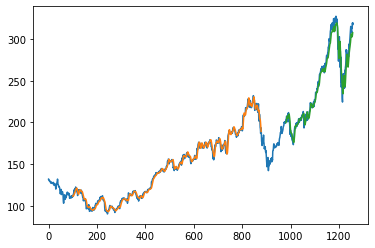

In [53]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(X_train_predictions_transformed)+look_back, :] = X_train_predictions_transformed
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(X_train_predictions_transformed)+(look_back*2)+1:len(df_1)-1, :] = X_test_predictions_transformed
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()